In [2]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [3]:
df=pd.read_csv('/Users/ravina/Desktop/FakeNewsClassifier/fake_or_real_news.csv')

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [252]:
df.shape

(6335, 4)

In [6]:
df['text'][4]

'It\'s primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.\n\nTrump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren\'t giving up just yet.\n\nA big win in New York could tip the scales for both the Republican and Democratic front-runners in this year\'s race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.\n\n"We have won eight out of the last nine caucuses and primaries! Cheer!" Sanders recently told supporters.\n\nWhile wins in New York for Trump and Clinton are expected, the margins of those victories are also important.\n\nTrump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state\'s 95 GOP delegates. That would put him one step closer to avoiding a contes

In [253]:
#to check if there is any null entry
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [254]:
df['label'] = df['label'].map({'REAL': 1, 'FAKE':0})
y = df.label

In [255]:
df['news']= df['title'] + ' ' + df['text']

In [256]:
df.head()

,Unnamed: 0,title,text,label,news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


In [257]:
df=df[['news','label']]

In [ ]:
df['news'][]

In [258]:
df.head()

,news,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy U....,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1


In [259]:
df.nunique()

news     6306
label       2
dtype: int64

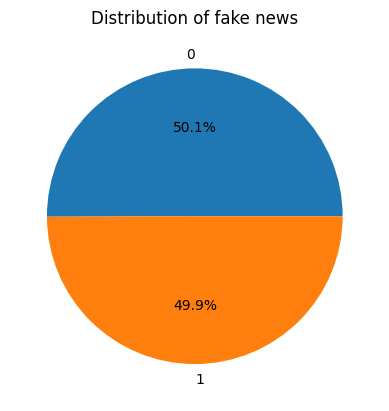

In [260]:

plt.pie(df['label'].value_counts(), labels=df['label'].unique(), autopct='%1.1f%%')
plt.title('Distribution of fake news')
plt.show()

#Observation: given data is relatively balanced 

In [261]:
#length of the text data
df['news_length']=df['news'].apply(lambda x: len(x))

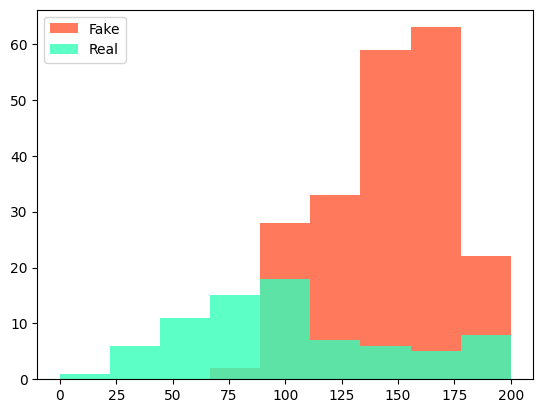

In [262]:
#news type and the length of the news
bins = np.linspace(0, 200, 10)

plt.hist(df[df["label"]== 1]["news_length"], bins, alpha=0.8, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["news_length"], bins, alpha=0.8, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

#most of fake news text is longer than the real one

In [340]:
df.head()

,news,label,news_length
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0,7547
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,2732
2,Kerry to go to Paris in gesture of sympathy U....,1,2587
3,Bernie supporters on Twitter erupt in anger ag...,0,2745
4,The Battle of New York: Why This Primary Matte...,1,1889


In [266]:
X=df['news']
y=df.label


In [341]:
X[2]

'Kerry to go to Paris in gesture of sympathy U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own

In [267]:
print(type(X))
type(y)

<class 'pandas.core.series.Series'>


pandas.core.series.Series

# TextPreprocessing

In [268]:
from nltk.corpus import stopwords
from nltk.stem  import PorterStemmer
import re


In [269]:
stemmer=PorterStemmer()

In [270]:
"""def stemming(text):
    data=re.sub('[^a-zA-Z]',' ',text)
    data=data.lower()
    data=data.split()
    data=[stemmer.stem(word) for word in data  if not word in stopwords.words('english')]
    result=" ".join(data)
    return result 
    """


    

'def stemming(text):\n    data=re.sub(\'[^a-zA-Z]\',\' \',text)\n    data=data.lower()\n    data=data.split()\n    data=[stemmer.stem(word) for word in data  if not word in stopwords.words(\'english\')]\n    result=" ".join(data)\n    return result \n    '

In [271]:
#X=X.apply(stemming)  i am avoiding stemming here as it decrease the accuract=y of the prediction 

In [301]:
X[0]

'You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership i

In [273]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=34)


In [274]:
X_train

1028    Why LeBron James’s Endorsement Could Help Clin...
3903    Prime Minster John Key caught channeling milli...
1072    Sure, We Want An Honest And Trustworthy Presid...
4034    War on the Streets of Paris: Armed Migrants Fi...
6213    Unions fight to preserve Obama’s immigration a...
                              ...                        
3830    Merkel brings shuttle diplomacy to White House...
5993    How to Build a Prepper’s Medical Emergency Kit...
2538    How Trump is following in Sanders's fundraisin...
5242    Awakening from the Living Dream Leave a reply ...
3489    Poll: Trump, Carson top GOP race; Clinton lead...
Name: news, Length: 5068, dtype: object

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [276]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [277]:
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
model=DecisionTreeClassifier()


In [280]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [281]:
y_pred=model.predict(X_test)

In [283]:
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8097868981846882


In [284]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [317]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [318]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


In [319]:
# Convert y_test and y_pred to NumPy arrays
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.9297553275453828


In [322]:
confusion_matrix(y_test,y_pred)

array([[586,  43],
       [ 46, 592]])

In [326]:
import pickle 


In [327]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [331]:
pickle.dump(pac,open('pac.pkl','wb'))

In [332]:
vector=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('pac.pkl','rb'))

In [335]:
def fake_news(news):
    vector_form=vector.transform([news])
    prediction=model.predict(vector_form)
    return  prediction

In [337]:
val=fake_news("""In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """)

In [338]:
if val==[0]:
    print('Fake')
else:
    print('Reliable')
    

reliable
